# Notebook 3: Flow control

This notebook will introduce ways of controlling the flow of execution in a program, including:
- if / elif / else blocks
- for loops
- while loops
- vectorized computations
- functions

In [1]:
# Import the usual stuff first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## `if` statements

In [2]:
# we can perform logic in python
a = True
b = False

In [3]:
a == b

False

In [4]:
a != b

True

In [ ]:
# We can wrap logical statements into if/else statements to create conditional statements
x = 5
y = 5

if x==y:
    print('In block 1')
    print('They are not equal!')
    
elif x>y:
    print('In block 2')
    print('x is more than y')

else:
    print('In block 3')
    print('y is more than x')

Note the indentation within each code block. Code within the same block must have the same indentation level, since this is how Python code blocks. Although the amount of indentation doesn't actually matter, you should adhere to the [PEP 8](https://www.python.org/dev/peps/pep-0008/) standard that code blocks be indented with **4 spaces**, not with tabs. 

__Exercise 1__

Write an if/else statement to guess the random number generated below.

In [5]:
from random import randint
randnum = randint(1,10)

In [6]:
# student code here



9


## `for` loops

Loops allow programmers to execute a block of code more than once without having to re-type the code multiple times.

In [8]:
# A for loop executes a code block once for each value in a collection of values that you specify

# Define list of numbers
num_list = list(range(10))
print('num_list = ', num_list)

In [8]:
# Print these numbers one by one
for n in num_list:
    print(n)

num_list =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
1
2
3
4
5
6
7
8
9


In [9]:
# For loops can loop over any "iterable" object, such as a string.
name = 'McClintock'
for c in name:
    print(c)

M
c
C
l
i
n
t
o
c
k


In [10]:
# If we want to fill a list with content, we can write a for loop:
tedious_list = []
for c in name:
    tedious_list.append(c)
print('tedious_list =', tedious_list)

tedious_list = ['M', 'c', 'C', 'l', 'i', 'n', 't', 'o', 'c', 'k']


In [11]:
# Alternatively, we can use a "list comprehension" to do this in one line
simple_list = [c for c in name]
print('simple_list = ', simple_list)

simple_list =  ['M', 'c', 'C', 'l', 'i', 'n', 't', 'o', 'c', 'k']


In [12]:
# If we want to use the index of each element in a list, we can create a counter
# that is incremented in each run through the code block
i=0
for c in name:
    print('name[%d] = %s'%(i,c))
    i += 1

name[0] = M
name[1] = c
name[2] = C
name[3] = l
name[4] = i
name[5] = n
name[6] = t
name[7] = o
name[8] = c
name[9] = k


In [13]:
# Alternatively, we can use enumerate(), which takes any iterable as input
# and outputs a an iterable of index-value pairs. This will assign values 
# TWO variables in each pass of the loop.
# This method is said to be more "Pythonic"
for i, c in enumerate(name):
    print("name[%d] = %s"%(i,c))

name[0] = M
name[1] = c
name[2] = C
name[3] = l
name[4] = i
name[5] = n
name[6] = t
name[7] = o
name[8] = c
name[9] = k


In [14]:
# Range is the Pythonic way of iterating over consecutive integers
for x in range(10):
    print(x)

0
1
2
3
4
5
6
7
8
9


In [18]:
# In Python 3, many functions that would seem to return a list actually return 
# an "iterable", where each subsequent element is computed on the fly. This is
# fine for loops, which execute sequentially. But if you want a list instead instead
# of an interable, you must "cast" that iterable as a list. This is one of the major 
# differences between Python 2 and Python 3, and can cause a lot of cryptic 
# incompatibilities if you're not aware of this issue.

v_iter = range(10)
print(type(v_iter))
print('iterable:', range(10))

v_list = list(range(10))
print(type(v_list))
print('list:    ', v_list, '\n')

e_iter = enumerate(name)
print(type(e_iter))
print('iterable:', e_iter)

e_list = list(enumerate(name))
print(type(e_list))
print('list:    ', e_list, '\n')

d = {'A':'T', 'C':'G', 'G':'C', 'T':'A'}
print(type(d.keys()))
print('iterable:', d.keys())
print(type(list(d.keys())))
print('list:    ', list(d.keys()))

<class 'range'>
iterable: range(0, 10)
<class 'list'>
list:     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

<class 'enumerate'>
iterable: <enumerate object at 0x7fbbbd8fbfc0>
<class 'list'>
list:     [(0, 'M'), (1, 'c'), (2, 'C'), (3, 'l'), (4, 'i'), (5, 'n'), (6, 't'), (7, 'o'), (8, 'c'), (9, 'k')] 

<class 'dict_keys'>
iterable: dict_keys(['A', 'C', 'G', 'T'])
<class 'list'>
list:     ['A', 'C', 'G', 'T']


__Exercise 2__

Write a for loop that prints out all even numbers from 1 to 10.

In [ ]:
#Student code here


## `while` loops

The ``while`` loop keeps going as long as the argument it is passed evaluates to True.

In [ ]:
# Assume you have a vial of P32
half_life = 14.3 # days

# Initially, the vial is at 100% activity
current_activity = 100

# As long as it has ~10% activity, it's still good to use for radioactive gels
min_activity = 10

# Compute how many days the vial is good for before it needs to be thrown out
num_days = 0
while current_activity > min_activity:
    current_activity /= 2**(1/half_life)
    num_days += 1
    
print('P32 activity will be reduced to %.1f%% by day %d.'%(current_activity, num_days))

When using while loops, **make very sure that your loop will actually stop at some point**. If you nevertheless end up with a loop that doesn't stop, go to "Kernel -> Interrupt" in the menu above. If your computer still acts strange, select "Kernel -> Restart". You will then have to evaluate your Jupyter notebook from the beginning. 

__Exercise 3__

Write a while loop that prints all even numbers from 1 to 10.

## Vectorized computations

While loops are computationally tractable in python, vectorized computations can help boost the speed when analyzing large datasets. This is possible using `numpy`.

In [2]:
# A numpy "array" is like a list, except all the elements are guarenteed to be of the same type.
N = 100
ns = np.arange(N)
ns

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [3]:
# Mathematical operations can be performed directly on numpy arrays
# (this cannot be done on lists).

# add 100 to all terms
terms = ns + 100
terms

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])

In [4]:
# The sum of entries in a numpy array can be computed using the .sum() method
sumterms = terms.sum()
sumterms

14950

A demonstration of numpy arrays through computing $\pi$ using the **dartboard method**: compute the fraction of random points in the unit square that are within distance 1/2 of the point (0.5,0.5). 

In [5]:
# Draw N random x- and y-coordinates within the unit square
N = 3000
xs = np.random.rand(N) # Generate N random numbers between 0 and 1
ys = np.random.rand(N) # Ditto
print('xs =', xs)
print('ys =', ys)

xs = [0.41725346 0.56916344 0.62013768 ... 0.5928897  0.67662997 0.14966105]
ys = [0.14367199 0.28143405 0.81946549 ... 0.84479139 0.80436271 0.09735172]


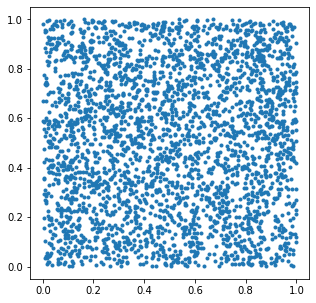

In [6]:
# Check to see what these xs and ys look like
plt.figure(figsize=[5,5])
plt.plot(xs,ys,'.')

In [7]:
# Compute distances from the point (.5, .5)
dists = np.sqrt((xs-.5)**2 + (ys-.5)**2)
print('dists =', repr(dists))

dists = array([0.36580957, 0.22924802, 0.34130816, ..., 0.35708486, 0.3519017 ,
       0.5337256 ])


In [8]:
# Compute whether points are in the circle
hits = (dists < .5)
print('hits =', repr(hits))

hits = array([ True,  True,  True, ...,  True,  True, False])


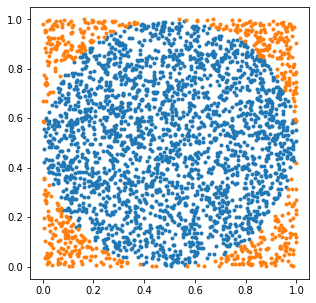

In [11]:
# Plot the hits vs. the non-hits
plt.figure(figsize=[5,5])
plt.plot(xs[hits], ys[hits], '.')    # plot only points i for which hits[i] is True
plt.plot(xs[~hits], ys[~hits], '.')  # plot only points i for which hits[i] is False

In [12]:
# Estimate pi from the number of hits
pi_dart = 4*hits.sum()/N
print('\u03C0 \u2248 %f (Dartboard method, %d points)'%(pi_dart, N))

π ≈ 3.178667 (Dartboard method, 3000 points)


## Functions

Functions allow us to modularize our code for easy interpretation and de-bugging. Variables that exisit only within the scope of a function are local variables, while variables that exisit throughout a program are called global variables.

In [19]:
def factorial(n): # n is called the "argument"
    """
    Returns n factorial. 
    n must be an integer satisfying 0 <= n <= 1000.
    """ # This is a "doc string"
    
    # Thow an error if n does not have the right form
    if isinstance(n,int) == False:
        print('Input is not an integer')
    elif n <= 0:
        print('Input is not nonnegative')
    elif n >= 1000:
        print('Intput is too large!')
    
    # Initialize return variable
    val = 1
    
    # Loop over i=1,2,...,n
    for i in range(1,n+1):   
        val *= i
        
    return val  # val is returned to the user

Another way to write the if/else block above is to use assert statements. There are many ways to accomplish similar tasks in python.

In [24]:
def factorial_2(n): # n is called the "argument"
    """
    Returns n factorial. 
    n must be an integer satisfying 0 <= n <= 1000.
    """ # This is a "doc string"
    
    # Thow an error if n does not have the right form
    assert isinstance(n,int),'Input is not an integer' 
    assert n >= 0, 'Input is not nonnegative' 
    assert n <= 1000, 'Intput is too large!'
    
    # Initialize return variable
    val = 1
    
    # Loop over i=1,2,...,n
    for i in range(1,n+1):   
        val *= i
        
    return val  # val is returned to the user

We test this function by computing n! for n=0,1,2,...,9

In [20]:
for n in range(10):
    print(str(n) + '! is ' + str(factorial(n)))

Input is not nonnegative
0! is 1
1! is 1
2! is 2
3! is 6
4! is 24
5! is 120
6! is 720
7! is 5040
8! is 40320
9! is 362880


Just as important as making sure your function works on valid input is to make sure that it EXPLICITLY FAILS on invalid input. 

In [26]:
# This should fail
print(factorial(1.1))

Input is not an integer


TypeError: 'float' object cannot be interpreted as an integer

In [27]:
# This should fail
print(factorial(-10))

Input is not nonnegative
1


In [28]:
# This should fail
print(factorial("I'm not even a number!"))

Input is not an integer


TypeError: can only concatenate str (not "int") to str

In [31]:
# You should also test boundary cases
print('0! ==', factorial(0))
print('1000! ==', factorial(1000))

Input is not nonnegative
0! == 1
Intput is too large!
1000! == 4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109

The docstring is accessible from within python, and is often very useful. Execute the following command and a window will pop up that describes what this function does.

In [32]:
# The built-in function help() will display another function's docstring' 
help(factorial)

Help on function factorial in module __main__:

factorial(n)
    Returns n factorial. 
    n must be an integer satisfying 0 <= n <= 1000.



In [33]:
# In Jupyter notebooks, you can also type a '?' after a function to see its documentation
factorial?

Signature: factorial(n)
Docstring:
Returns n factorial. 
n must be an integer satisfying 0 <= n <= 1000.
File:      ~/URP_2021_Programming_Course/lecture_2/<ipython-input-19-5413f144cecd>
Type:      function


__Exercise 4__

Write a function that takes in a list of numbers and returns its average.

In [10]:
# Write function here

In [ ]:
# Check docstring here

In [9]:
# Test input checking here

__Exercise 5__

Write a function that takes in two numbers and an operation to b.

In [10]:
# Write function here

In [ ]:
# Check docstring here

In [9]:
# Test input checking here